In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import seaborn as sns

In [2]:
import gc
gc.enable()

## Load Data

In [3]:
gc.collect()

0

In [4]:
df1 = pd.read_csv('loan_2016.csv')

C:\Users\Weiqun\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (16,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df1.shape

(434407, 108)

In [6]:
df1[:5][:5]

,secappopenactil,bcopentobuy,initialliststatus,numactvbctl,grade,mthssincelastrecord,totcurbal,secappnumrevaccts,secappmthssincelastmajorderog,subgrade,...,totalcutl,mthssincelastmajorderog,numtloppast12m,percentbcgt75,pubrecbankruptcies,ilutil,secappinqlast6mths,purpose,issued,loanstatus
0,NaN,2168.0,f,7.0,C,NaN,15055.0,NaN,NaN,C2,...,0.0,NaN,1.0,37.5,0.0,NaN,NaN,debt_consolidation,Mar-2016,Fully Paid
1,NaN,12271.0,w,3.0,D,NaN,224465.0,NaN,NaN,D5,...,1.0,NaN,3.0,50.0,0.0,79.0,NaN,credit_card,Mar-2016,Current
2,NaN,33991.0,w,2.0,A,NaN,33681.0,NaN,NaN,A1,...,14.0,NaN,4.0,20.0,0.0,74.0,NaN,debt_consolidation,Mar-2016,Fully Paid
3,NaN,3215.0,w,3.0,D,NaN,189186.0,NaN,NaN,D5,...,3.0,NaN,5.0,100.0,0.0,92.0,NaN,debt_consolidation,Mar-2016,Charged Off
4,NaN,5048.0,w,3.0,C,NaN,167937.0,NaN,NaN,C1,...,0.0,NaN,2.0,50.0,0.0,NaN,NaN,credit_card,Mar-2016,Charged Off


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434407 entries, 0 to 434406
Columns: 108 entries, secappopenactil to loanstatus
dtypes: float64(88), int64(1), object(19)
memory usage: 357.9+ MB


## Select Data

In [8]:
all_null_feature =['secappopenactil',
 'secappnumrevaccts',
 'secappmthssincelastmajorderog',
 'secappcollections12mthsexmed',
 'revolbaljoint',
 'secappopenacc',
 'secappficorangelow',
 'memberid',
 'secappmortacc',
 'secappearliestcrline',
 'secappchargeoffwithin12mths',
 'secapprevolutil',
 'secappficorangehigh',
 'secappinqlast6mths']

In [9]:
ob_feature=['initialliststatus',
 'grade',
 'subgrade',
 'verificationstatusjoint',
 'earliestcrline',
 'applicationtype',
 'intrate',
 'desc',
 'term',
 'homeownership',
 'addrstate',
 'revolutil',
 'zipcode',
 'verificationstatus',
 'emptitle',
 'emplength',
 'purpose',
 'issued',
 'loanstatus']

In [114]:
num_feature=['bcopentobuy',
 'numactvbctl',
 'mthssincelastrecord',
 'totcurbal',
 'mosinrcnttl',
 'openrv12m',
 'inqlast12m',
 'mortacc',
 'mthssincelastdelinq',
 'numactvrevtl',
 'tothicredlim',
 'ficorangehigh',
 'maxbalbc',
 'openil24m',
 'numbctl',
 'totalrevhilim',
 'totcollamt',
 'numtl120dpd2m',
 'totalbalexmort',
 'annualincjoint',
 'ficorangelow',
 'totalacc',
 'mthssincerecentbcdlq',
 'installment',
 'numrevaccts',
 'pubrec',
 'accopenpast24mths',
 'numoprevtl',
 'avgcurbal',
 'openactil',
 'dti',
 'openacc6m',
 'totalbalil',
 'delinq2yrs',
 'fundedamnt',
 'mosinoldilacct',
 'annualinc',
 'inqfi',
 'numtl30dpd',
 'loanamnt',
 'numsats',
 'mthssincerecentrevoldelinq',
 'mthssincerecentbc',
 'id',
 'revolbal',
 'inqlast6mths',
 'mthssincercntil',
 'openrv24m',
 'totalilhighcreditlimit',
 'collections12mthsexmed',
 'chargeoffwithin12mths',
 'numtl90gdpd24m',
 'delinqamnt',
 'mosinoldrevtlop',
 'taxliens',
 'numbcsats',
 'totalbclimit',
 'dtijoint',
 'numacctsever120pd',
 'accnowdelinq',
 'openil12m',
 'pcttlnvrdlq',
 'bcutil',
 'mthssincerecentinq',
 'numiltl',
 'mosinrcntrevtlop',
 'allutil',
 'openacc',
 'numrevtlbalgt0',
 'totalcutl',
 'mthssincelastmajorderog',
 'numtloppast12m',
 'percentbcgt75',
 'pubrecbankruptcies',
 'ilutil']

In [11]:
select_feature=ob_feature+num_feature
len(select_feature)

94

In [12]:
# remove fundedamnt since it always equals to 1 for issued loans and varied during different time of a current loan

num_feature.remove('fundedamnt')


In [13]:
# remove 'id','issued' and 'loanstatus', since they are index, train/test flag and target
num_feature.remove('id')
ob_feature.remove('loanstatus')
ob_feature.remove('issued')


In [14]:
# remove 'desc' from ob_feature and select_feature
ob_feature.remove('desc')


In [15]:
select_feature=ob_feature+num_feature
len(select_feature)

89

In [16]:
# selected features left
df=df1[select_feature+['id','loanstatus','issued']]

In [17]:
df.shape

(434407, 92)

## only use term=36 months and loanstatus = fully paid and charged off

In [18]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [19]:
df = df.query("term ==' 36 months'")

In [20]:
df.shape

(295807, 92)

In [21]:
ob_feature.remove('term')

In [22]:
df.shape

(295807, 92)

## Label Target

In [23]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [24]:
print df.loanstatus.value_counts()
print df.loanstatus.value_counts(normalize=True)

0    245786
1     50021
Name: loanstatus, dtype: int64
0    0.8309
1    0.1691
Name: loanstatus, dtype: float64


## Out of time testing set and in-time training set: Oct~Dec as test)

In [25]:
issued=list(df['issued'].unique())
issued

['Mar-2016',
 'Feb-2016',
 'Jan-2016',
 'Jun-2016',
 'May-2016',
 'Apr-2016',
 'Sep-2016',
 'Aug-2016',
 'Jul-2016',
 'Dec-2016',
 'Nov-2016',
 'Oct-2016']

In [26]:
df.issued.value_counts()

Mar-2016    44825
Feb-2016    28609
Apr-2016    28086
Aug-2016    26703
Jul-2016    25218
Jun-2016    24513
Jan-2016    22672
May-2016    21791
Dec-2016    18726
Sep-2016    18697
Oct-2016    17986
Nov-2016    17981
Name: issued, dtype: int64

In [27]:
df['train_flg'] = df.issued.apply(lambda x: 0 if x in ['Oct-2016','Nov-2016','Dec-2016'] else 1)
df.train_flg.value_counts()

1    241114
0     54693
Name: train_flg, dtype: int64

## Feature Engineering & Cleaning

#### Datetime to numeric feature

In [28]:
ob_feature

['initialliststatus',
 'grade',
 'subgrade',
 'verificationstatusjoint',
 'earliestcrline',
 'applicationtype',
 'intrate',
 'homeownership',
 'addrstate',
 'revolutil',
 'zipcode',
 'verificationstatus',
 'emptitle',
 'emplength',
 'purpose']

In [29]:
df.earliestcrline.unique()[:5]

array(['May-2006', 'Dec-2001', 'Sep-2008', 'May-1990', 'Feb-2006'], dtype=object)

In [30]:
# convert to number of months to Dec 2016

In [31]:
cl_month=df.earliestcrline.apply(lambda x: x.split('-')[0])
cl_year=df.earliestcrline.apply(lambda x: int(x.split('-')[1]))

In [32]:
cl_month.unique()

array(['May', 'Dec', 'Sep', 'Feb', 'Nov', 'Mar', 'Jul', 'Jan', 'Apr',
       'Jun', 'Aug', 'Oct'], dtype=object)

In [33]:
cl_year.unique()

array([2006, 2001, 2008, 1990, 1994, 2012, 1999, 1986, 2005, 2002, 1995,
       2010, 1993, 2003, 2007, 2009, 1992, 2004, 1975, 1997, 1985, 1996,
       2000, 2011, 1981, 1998, 1980, 1989, 1983, 1991, 1982, 1988, 1987,
       1972, 2013, 1978, 1984, 1976, 1963, 1969, 1979, 1973, 1974, 1977,
       1971, 1970, 1966, 1967, 1968, 1965, 1955, 1960, 1957, 1961, 1964,
       1958, 1959, 1962, 1956, 1948, 1952, 1933, 1954, 1946, 1951], dtype=int64)

In [34]:
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [35]:
df['earliestcrline_month']=df.earliestcrline.apply(lambda x: (2016-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])

In [36]:
df.earliestcrline_month[:5]

0    127
2    180
5     99
7    319
8    130
Name: earliestcrline_month, dtype: int64

In [37]:
num_feature.append('earliestcrline_month')
ob_feature.remove('earliestcrline')

In [38]:
print len(ob_feature), len(num_feature)

14 74


### emplength to numeric feature

In [39]:
print df['emplength'].isnull().sum()
df['emplength'].unique()

0


array(['9 years', '10+ years', '5 years', 'n/a', '2 years', '< 1 year',
       '1 year', '3 years', '8 years', '6 years', '7 years', '4 years'], dtype=object)

In [40]:
df['emplength'].replace('n/a', np.nan, inplace=True)
df['emplength'].replace('< 1 year', '0', inplace=True)
df['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df.emplength.fillna(value=-999,inplace=True)
df['emplength'] = df['emplength'].astype(int)

In [41]:
df.emplength.value_counts()

 10     97261
 2      27689
 3      24299
 0      22739
-999    21320
 1      20468
 5      18143
 4      17691
 8      12680
 6      12677
 9      11293
 7       9547
Name: emplength, dtype: int64

In [42]:
num_feature.append('emplength')
ob_feature.remove('emplength')
print len(num_feature), len(ob_feature)

75 13


## % to numeric feature: intrate, revolutil

In [43]:
intrate=df.intrate.apply(lambda x: float(x.replace('%','')))

In [44]:
df.intrate=intrate
df.intrate[:2]

0    12.99
2     5.32
Name: intrate, dtype: float64

In [45]:
df.revolutil[:3]

0      63%
2    18.4%
5     7.2%
Name: revolutil, dtype: object

In [46]:
revolutil=df.revolutil.apply(lambda x: str(x).replace('%','')).astype(float)

In [47]:
df.revolutil=revolutil
df.revolutil[:2]

0    63.0
2    18.4
Name: revolutil, dtype: float64

In [48]:
ob_feature.remove('intrate')
num_feature.append('intrate')
ob_feature.remove('revolutil')
num_feature.append('revolutil')

In [49]:
print len(ob_feature), len(num_feature)

11 77


#### Ordinal feature encoding : grade, subgrade

In [50]:
Dic_grade = {"A": 1, 
            "B": 2, 
            "C": 3, 
            "D": 4, 
            "E": 5,
            "F": 6, 
            "G": 7}

In [51]:
df.grade = df.grade.map(Dic_grade)

In [52]:
df.subgrade = df.subgrade.apply(lambda x: (Dic_grade[x[0]] - 1) * 5 + int(x[1]))

In [53]:
ob_feature.remove('grade')
num_feature.append('grade')
ob_feature.remove('subgrade')
num_feature.append('subgrade')

In [54]:
print len(ob_feature), len(num_feature)

9 79


### High cardinality feature encoding

###### Zip Code - frequency encoding 

In [55]:
print df.zipcode.nunique(), df.zipcode.unique()[:5]

903 ['211xx' '554xx' '328xx' '163xx' '117xx']


In [56]:
# convert zipcode to int
df.zipcode = df.zipcode.apply(lambda x: int(x[0:3]))

In [57]:
df.zipcode[:5]

0    211
2    554
5    328
7    163
8    117
Name: zipcode, dtype: int64

In [58]:
zipcode_freq = df.groupby("zipcode").size().reset_index()

In [59]:
zipcode_freq[:5]

,zipcode,0
0,8,2
1,9,1
2,10,461
3,11,155
4,12,106


In [60]:
zipcode_freq.columns = ["zipcode", "zipcode_freq"]

In [61]:
df = pd.merge(df, zipcode_freq, how = "left", on = "zipcode")

In [62]:
df.zipcode_freq[:5]

0     572
1    1118
2    1125
3      74
4    2024
Name: zipcode_freq, dtype: int64

In [63]:
ob_feature.remove('zipcode')
num_feature.append('zipcode')
num_feature.append('zipcode_freq')
print len(ob_feature), len(num_feature)

8 81


### emptitle-frequency encoding (can do some NLP for later stage)

In [64]:
emptitle_freq = df.groupby("emptitle").size().reset_index()
emptitle_freq.columns = ["emptitle", "emptitle_freq"]
df = pd.merge(df, emptitle_freq, how = "left", on = "emptitle")


In [65]:
ob_feature.remove('emptitle')
num_feature.append('emptitle_freq')
print len(ob_feature), len(num_feature)

7 82


###### Addr_state - frequency encoding

In [66]:
addrstate_freq = df.groupby("addrstate").size().reset_index()
addrstate_freq.columns = ["addrstate", "addrstate_freq"]
df = pd.merge(df, addrstate_freq, how = "left", on = "addrstate")


In [67]:
ob_feature.remove('addrstate')
num_feature.append('addrstate_freq')
print len(ob_feature), len(num_feature)

6 83


In [68]:
ob_feature

['initialliststatus',
 'verificationstatusjoint',
 'applicationtype',
 'homeownership',
 'verificationstatus',
 'purpose']

In [69]:
# initialliststatus has only two values, change it to 0,1
initialliststatus= df.initialliststatus.apply(lambda x: 0 if x =='w' else 1)
df.initialliststatus = initialliststatus
df.initialliststatus.value_counts()

0    217986
1     77821
Name: initialliststatus, dtype: int64

In [70]:
# applicationtype has only two values (Individual, Joint), change it to 0,1; only less than 2% is 1.
applicationtype= df.applicationtype.apply(lambda x: 0 if x =='Individual' else 1)
df.applicationtype = applicationtype 
df.applicationtype.value_counts()

0    291419
1      4388
Name: applicationtype, dtype: int64

In [71]:
ob_feature.remove('initialliststatus')
num_feature.append('initialliststatus')
ob_feature.remove('applicationtype')
num_feature.append('applicationtype')
print len(ob_feature), len(num_feature), ob_feature

4 85 ['verificationstatusjoint', 'homeownership', 'verificationstatus', 'purpose']


In [74]:
# verificationstatusjoint mostly consistent with applicationtype, just remove it
ob_feature.remove('verificationstatusjoint')
print len(ob_feature), len(num_feature), ob_feature

3 85 ['homeownership', 'verificationstatus', 'purpose']


#### One hot encoding

In [75]:
dummy_feature = ["homeownership", "verificationstatus", "purpose"]

In [76]:
df_dummy = pd.get_dummies(df[dummy_feature])

In [77]:
OHE_feature=list(df_dummy.columns.values)

In [78]:
len(OHE_feature)

20

In [79]:
df=pd.concat([df,df_dummy], axis=1 )

In [80]:
df.shape

(295807, 117)

In [81]:
for feat in dummy_feature:
    
    ob_feature.remove(feat)

In [82]:
len(ob_feature)

0

In [83]:
select_feature=num_feature+OHE_feature

In [84]:
len(select_feature)

105

In [115]:
df.shape

(295807, 117)

##  XGBoost 

In [85]:
feat=select_feature
print feat

['bcopentobuy', 'numactvbctl', 'mthssincelastrecord', 'totcurbal', 'mosinrcnttl', 'openrv12m', 'inqlast12m', 'mortacc', 'mthssincelastdelinq', 'numactvrevtl', 'tothicredlim', 'ficorangehigh', 'maxbalbc', 'openil24m', 'numbctl', 'totalrevhilim', 'totcollamt', 'numtl120dpd2m', 'totalbalexmort', 'annualincjoint', 'ficorangelow', 'totalacc', 'mthssincerecentbcdlq', 'installment', 'numrevaccts', 'pubrec', 'accopenpast24mths', 'numoprevtl', 'avgcurbal', 'openactil', 'dti', 'openacc6m', 'totalbalil', 'delinq2yrs', 'mosinoldilacct', 'annualinc', 'inqfi', 'numtl30dpd', 'loanamnt', 'numsats', 'mthssincerecentrevoldelinq', 'mthssincerecentbc', 'revolbal', 'inqlast6mths', 'mthssincercntil', 'openrv24m', 'totalilhighcreditlimit', 'collections12mthsexmed', 'chargeoffwithin12mths', 'numtl90gdpd24m', 'delinqamnt', 'mosinoldrevtlop', 'taxliens', 'numbcsats', 'totalbclimit', 'dtijoint', 'numacctsever120pd', 'accnowdelinq', 'openil12m', 'pcttlnvrdlq', 'bcutil', 'mthssincerecentinq', 'numiltl', 'mosinrcnt

### Preliminary manually parameter tuning based on stratified train-test split

In [86]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
#Kfolds = StratifiedKFold(df_all['loan_status'], n_folds = 3, shuffle=True, random_state=2019)

C:\Users\Weiqun\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [87]:
df_train = df.query("train_flg == 1")
df_test =df.query("train_flg == 0" )

In [88]:
print df_train.shape, df_test.shape

(241114, 117) (54693, 117)


In [89]:
df_train[feat].shape

(241114, 105)

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2014, stratify = df_train.loanstatus )

In [91]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [92]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

In [93]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [94]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.693382	eval-auc:0.682204
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.699379	eval-auc:0.687537
[2]	train-auc:0.700898	eval-auc:0.689263
[3]	train-auc:0.702397	eval-auc:0.689853
[4]	train-auc:0.703512	eval-auc:0.690924
[5]	train-auc:0.704477	eval-auc:0.69219
[6]	train-auc:0.704944	eval-auc:0.692312
[7]	train-auc:0.705583	eval-auc:0.692461
[8]	train-auc:0.706491	eval-auc:0.693374
[9]	train-auc:0.706799	eval-auc:0.693548
[10]	train-auc:0.707108	eval-auc:0.693894
[11]	train-auc:0.707864	eval-auc:0.694216
[12]	train-auc:0.708271	eval-auc:0.694546
[13]	train-auc:0.708467	eval-auc:0.694796
[14]	train-auc:0.708963	eval-auc:0.695118
[15]	train-auc:0.70938	eval-auc:0.695232
[16]	train-auc:0.709856	eval-auc:0.695754
[17]	train-auc:0.710148	eval-auc:0.695967
[18]	train-auc:0.710442	eval-auc:0.696048
[19]	train-auc:0.710868	eval-auc:0.696175
[20]	train-auc:0.711162	eval-au

[191]	train-auc:0.761042	eval-auc:0.709104
[192]	train-auc:0.761331	eval-auc:0.709069
[193]	train-auc:0.761603	eval-auc:0.709107
[194]	train-auc:0.761859	eval-auc:0.709093
[195]	train-auc:0.762009	eval-auc:0.709118
[196]	train-auc:0.762171	eval-auc:0.709123
[197]	train-auc:0.762423	eval-auc:0.709105
[198]	train-auc:0.762612	eval-auc:0.709108
[199]	train-auc:0.762827	eval-auc:0.709138
[200]	train-auc:0.762899	eval-auc:0.709164
[201]	train-auc:0.7631	eval-auc:0.709147
[202]	train-auc:0.763324	eval-auc:0.709197
[203]	train-auc:0.763665	eval-auc:0.709236
[204]	train-auc:0.763935	eval-auc:0.70928
[205]	train-auc:0.764136	eval-auc:0.709301
[206]	train-auc:0.764454	eval-auc:0.709271
[207]	train-auc:0.764712	eval-auc:0.709251
[208]	train-auc:0.765004	eval-auc:0.709293
[209]	train-auc:0.765229	eval-auc:0.709279
[210]	train-auc:0.765349	eval-auc:0.709324
[211]	train-auc:0.765612	eval-auc:0.709347
[212]	train-auc:0.765919	eval-auc:0.709324
[213]	train-auc:0.766056	eval-auc:0.70932
[214]	train-auc

[383]	train-auc:0.795863	eval-auc:0.710017
[384]	train-auc:0.796039	eval-auc:0.709969
[385]	train-auc:0.796134	eval-auc:0.709977
[386]	train-auc:0.796345	eval-auc:0.710023
[387]	train-auc:0.796503	eval-auc:0.710026
[388]	train-auc:0.796699	eval-auc:0.709979
[389]	train-auc:0.796843	eval-auc:0.709972
[390]	train-auc:0.797092	eval-auc:0.709961
[391]	train-auc:0.7973	eval-auc:0.709958
[392]	train-auc:0.797449	eval-auc:0.709968
[393]	train-auc:0.797536	eval-auc:0.709968
Stopping. Best iteration:
[343]	train-auc:0.789058	eval-auc:0.710193



In [97]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print "Area under the ROC curve - validation: %f" % roc_auc
    print "Area under the ROC curve - train: %f" % roc_auc_1
    print "Area under the ROC curve - test: %f" % roc_auc_2
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - valid(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()


### ROC curve

Area under the ROC curve - validation: 0.710193
Area under the ROC curve - train: 0.789058
Area under the ROC curve - test: 0.694061


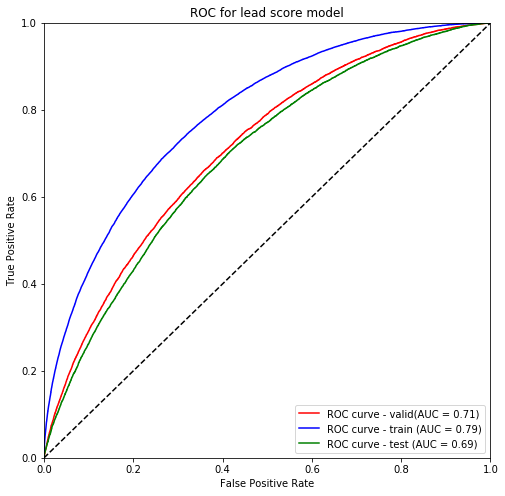

In [98]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

### Distribution of predicted values

In [99]:
y_pred = gbm.predict(dtest)

In [100]:
print y_pred.max(), y_pred.min(), y_pred.mean()

0.835738 0.00394629 0.167875


### Feature importance

In [101]:
importance=gbm.get_fscore()

In [102]:
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [103]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
62,dti,0.038418
75,emptitle_freq,0.030609
25,installment,0.029184
82,zipcode,0.027417
28,mosinoldilacct,0.026790
40,mosinoldrevtlop,0.026163
48,mthssincercntil,0.024909
29,annualinc,0.024624
14,maxbalbc,0.024339
13,tothicredlim,0.023940


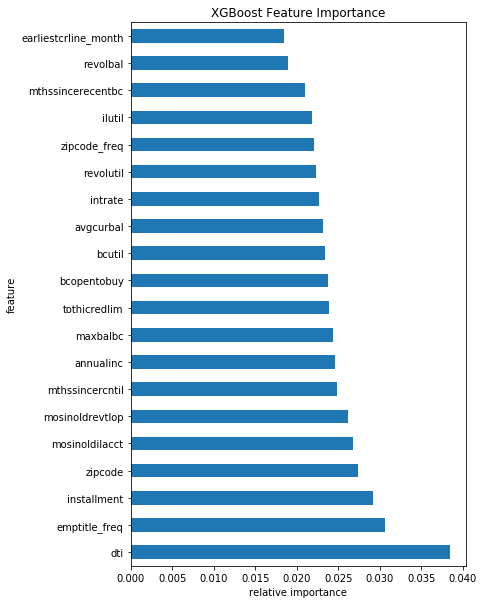

In [104]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [105]:
grade_importance = df_importance.query("feature=='grade'")
grade_importance

,feature,fscore
50,grade,0.001995


In [106]:
subgrade_importance = df_importance.query("feature=='subgrade'")
subgrade_importance

,feature,fscore
5,subgrade,0.010146


In [107]:
intrate_importance = df_importance.query("feature=='intrate'")
intrate_importance

,feature,fscore
61,intrate,0.022629


In [108]:
df_importance.query("feature=='loanamnt'")

,feature,fscore
23,loanamnt,0.018126


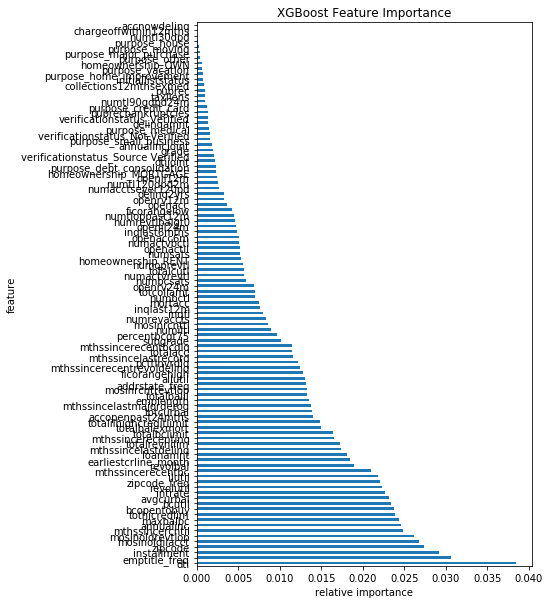

In [109]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## Save model

In [110]:
import pickle

In [111]:
pickle.dump(gbm, open('model.pkl', "wb"))

In [112]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima.joblib.dat")

['pima.joblib.dat']

In [113]:
with open('model.pkl', 'w') as outfile:
  
    pickle.dump(gbm, outfile)